In [61]:
import numpy as np
import scipy
import sklearn
import graphviz

In [62]:
#to do , work out the percent of fatal accidents, to get the model to handle imbalanced data
# going forward develop more ways to deal with this imbalance

In [63]:
import pandas as pd
#.venv\Scripts\activate.bat 
df = pd.read_csv('C:\\Users\\fiona.havelock\\Documents\\FinalProject\\londonWithoutNoise1.csv')
df

,accidentIndex,accidentYear,accidentReference,locationEasting,locationNorthing,longitude,latitude,PoliceForceDescription,AccidentSeverityDescription,numVehicles,...,PoliceAttendanceDescription,TrunkRoadDescription,lsoaOfAccident,tavg,prcp,snow,wspd,rad_lng,rad_lat,cluster
0,2020430390553,2020,430390553,455547,207474,-1.196513,51.763207,Thames Valley,Slight,4,...,Yes,Non-trunk,E01028513,5.700000,0.3,0,8.100000,-0.020883,0.903438,237
1,2021010342279,2021,010342279,527425,175462,-0.167045,51.463795,Metropolitan Police,Slight,2,...,Yes,Non-trunk,E01004551,8.400000,0.0,0,16.900000,-0.002915,0.898213,339
2,2021010342290,2021,010342290,531922,178986,-0.101031,51.494435,Metropolitan Police,Slight,1,...,Yes,Non-trunk,E01003933,8.400000,0.0,0,16.900000,-0.001763,0.898747,0
3,2021010342354,2021,010342354,526945,177494,-0.173222,51.482164,Metropolitan Police,Slight,2,...,No - accident was reported using a self comple...,Non-trunk,E01002840,8.400000,0.0,0,16.900000,-0.003023,0.898533,1
4,2021010342371,2021,010342371,532503,178971,-0.092673,51.494164,Metropolitan Police,Fatal,3,...,Yes,Non-trunk,E01032720,8.400000,0.0,0,16.900000,-0.001617,0.898743,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42068,2020430248650,2020,430248650,455501,207452,-1.197183,51.763014,Thames Valley,Slight,2,...,No - accident was reported using a self comple...,Non-trunk,E01028513,23.400000,0.0,0,16.600000,-0.020895,0.903435,237
42069,2020430282223,2020,430282223,455498,207454,-1.197226,51.763032,Thames Valley,Slight,2,...,No - accident was reported using a self comple...,Non-trunk,E01028513,13.900000,0.0,0,12.000000,-0.020896,0.903435,237
42070,2020430287872,2020,430287872,455560,207441,-1.196330,51.762909,Thames Valley,Slight,2,...,No - accident was reported using a self comple...,Non-trunk,E01028574,16.700001,0.0,0,13.200000,-0.020880,0.903433,237
42071,2020430314906,2020,430314906,452263,205967,-1.244320,51.749974,Thames Valley,Slight,2,...,No - accident was reported using a self comple...,Non-trunk,E01028588,9.500000,30.5,0,19.799999,-0.021717,0.903207,208


In [64]:
#filter the slight accidents 
filter_slight = df['AccidentSeverityDescription'] == 'Slight'
slight_series = df.where(filter_slight).groupby(['accidentDate', 'DayOfWeekDescription', 'tavg', 
'prcp', 'snow', 'wspd', 'cluster']).size().to_frame('number_slight_accidents')
#reset index to align dataframe
slight_df = pd.DataFrame(slight_series).reset_index()
#sort the dataframe to make it more readable
slight_df.sort_values(by=['accidentDate'], ascending=True).head(10)

,accidentDate,DayOfWeekDescription,tavg,prcp,snow,wspd,cluster,number_slight_accidents
0,2009-01-01,Thursday,3.1,0.0,0.0,8.1,105.0,1
1,2009-01-01,Thursday,3.1,0.0,0.0,8.1,215.0,1
2,2009-01-01,Thursday,3.1,0.0,0.0,8.1,240.0,1
3,2009-01-01,Thursday,3.1,0.0,0.0,8.1,267.0,1
4,2009-01-01,Thursday,3.1,0.0,0.0,8.1,283.0,1
5,2009-01-01,Thursday,3.1,0.0,0.0,8.1,297.0,1
6,2009-01-02,Friday,3.7,0.0,0.0,11.4,104.0,1
7,2009-01-02,Friday,3.7,0.0,0.0,11.4,123.0,1
8,2009-01-02,Friday,3.7,0.0,0.0,11.4,255.0,1
12,2009-01-03,Saturday,1.4,0.0,0.0,5.7,130.0,1


In [65]:
#filter the Serious accidents
filter_serious = df['AccidentSeverityDescription'] == 'Serious'
serious_series = df.where(filter_serious).groupby(['accidentDate', 'DayOfWeekDescription', 'tavg', 
'prcp', 'snow', 'wspd', 'cluster']).size().to_frame('number_serious_accidents')
#reset index to align dataframe
serious_df = pd.DataFrame(serious_series).reset_index()
#sort the dataframe to make it more readable
serious_df.sort_values(by=['accidentDate'], ascending=True).head(10)

,accidentDate,DayOfWeekDescription,tavg,prcp,snow,wspd,cluster,number_serious_accidents
0,2009-01-01,Thursday,3.1,0.0,0.0,8.100000,129.0,1
1,2009-01-01,Thursday,3.1,0.0,0.0,8.100000,226.0,1
2,2009-01-03,Saturday,1.4,0.0,0.0,5.700000,0.0,1
3,2009-01-03,Saturday,1.4,0.0,0.0,5.700000,85.0,1
4,2009-01-04,Sunday,0.2,0.0,0.0,5.200000,9.0,1
5,2009-01-06,Tuesday,-0.3,1.3,0.0,11.100000,1.0,1
6,2009-01-06,Tuesday,-0.3,1.3,0.0,11.100000,45.0,1
7,2009-01-07,Wednesday,1.2,0.0,0.0,5.600000,168.0,1
8,2009-01-08,Thursday,3.6,0.0,0.0,3.800000,243.0,1
9,2009-01-11,Sunday,6.5,0.3,0.0,19.200001,163.0,1


In [66]:
#filter the fatal accidents
filter_fatal = df['AccidentSeverityDescription'] == 'Fatal'
fatal_series = df.where(filter_fatal).groupby(['accidentDate', 'DayOfWeekDescription',  'tavg', 
'prcp', 'snow', 'wspd', 'cluster']).size().to_frame('number_fatal_accidents')
#reset index to align dataframe
fatal_df = pd.DataFrame(fatal_series).reset_index()
#sort the dataframe to make it more readable
fatal_df.sort_values(by=['accidentDate'], ascending=True).head(10)

,accidentDate,DayOfWeekDescription,tavg,prcp,snow,wspd,cluster,number_fatal_accidents
0,2009-01-05,Monday,1.500000,0.0,0.0,16.299999,107.0,1
1,2009-02-04,Wednesday,2.900000,5.1,20.0,14.400000,218.0,1
2,2009-02-08,Sunday,3.600000,0.5,0.0,8.800000,114.0,1
3,2009-03-21,Saturday,9.600000,0.0,0.0,9.300000,225.0,1
4,2009-04-08,Wednesday,12.100000,1.8,0.0,22.400000,0.0,1
5,2009-04-09,Thursday,13.100000,0.0,0.0,15.800000,230.0,1
6,2009-04-12,Sunday,11.400000,3.3,0.0,7.500000,130.0,1
7,2009-05-15,Friday,13.800000,10.7,0.0,15.700000,274.0,1
8,2009-06-12,Friday,16.500000,0.0,0.0,5.900000,175.0,1
9,2009-06-25,Thursday,19.200001,0.0,0.0,18.700001,273.0,1


In [67]:
merged_df = pd.merge(serious_df, slight_df, how='outer').sort_values(by=['accidentDate'], ascending=True)
merged_df.head(10)

,accidentDate,DayOfWeekDescription,tavg,prcp,snow,wspd,cluster,number_serious_accidents,number_slight_accidents
0,2009-01-01,Thursday,3.1,0.0,0.0,8.1,129.0,1.0,NaN
4715,2009-01-01,Thursday,3.1,0.0,0.0,8.1,297.0,NaN,1.0
4714,2009-01-01,Thursday,3.1,0.0,0.0,8.1,283.0,NaN,1.0
4713,2009-01-01,Thursday,3.1,0.0,0.0,8.1,267.0,NaN,1.0
4711,2009-01-01,Thursday,3.1,0.0,0.0,8.1,215.0,NaN,1.0
4710,2009-01-01,Thursday,3.1,0.0,0.0,8.1,105.0,NaN,1.0
4712,2009-01-01,Thursday,3.1,0.0,0.0,8.1,240.0,NaN,1.0
1,2009-01-01,Thursday,3.1,0.0,0.0,8.1,226.0,1.0,NaN
4716,2009-01-02,Friday,3.7,0.0,0.0,11.4,104.0,NaN,1.0
4717,2009-01-02,Friday,3.7,0.0,0.0,11.4,123.0,NaN,1.0


In [68]:
accidents_df = pd.merge(merged_df, fatal_df, how='outer').sort_values(by=['accidentDate'], ascending=True)
accidents_df.head(10)

,accidentDate,DayOfWeekDescription,tavg,prcp,snow,wspd,cluster,number_serious_accidents,number_slight_accidents,number_fatal_accidents
0,2009-01-01,Thursday,3.1,0.0,0.0,8.1,129.0,1.0,NaN,NaN
1,2009-01-01,Thursday,3.1,0.0,0.0,8.1,297.0,NaN,1.0,NaN
2,2009-01-01,Thursday,3.1,0.0,0.0,8.1,283.0,NaN,1.0,NaN
3,2009-01-01,Thursday,3.1,0.0,0.0,8.1,267.0,NaN,1.0,NaN
4,2009-01-01,Thursday,3.1,0.0,0.0,8.1,215.0,NaN,1.0,NaN
5,2009-01-01,Thursday,3.1,0.0,0.0,8.1,105.0,NaN,1.0,NaN
6,2009-01-01,Thursday,3.1,0.0,0.0,8.1,240.0,NaN,1.0,NaN
7,2009-01-01,Thursday,3.1,0.0,0.0,8.1,226.0,1.0,NaN,NaN
8,2009-01-02,Friday,3.7,0.0,0.0,11.4,104.0,NaN,1.0,NaN
9,2009-01-02,Friday,3.7,0.0,0.0,11.4,123.0,NaN,1.0,NaN


In [69]:
#fill the NaN accident values with 0 and set the number to a int32
accidents_df['number_serious_accidents'].fillna(value=0, inplace=True)
accidents_df['number_serious_accidents'] = accidents_df['number_serious_accidents'].astype('int32')
accidents_df['number_slight_accidents'].fillna(value=0, inplace=True)
accidents_df['number_slight_accidents'] = accidents_df['number_slight_accidents'].astype('int32')
accidents_df['number_fatal_accidents'].fillna(value=0, inplace=True)
accidents_df['number_fatal_accidents'] = accidents_df['number_fatal_accidents'].astype('int32')

In [70]:
new_df = accidents_df.drop(['accidentDate'], axis=1)
new_df

,DayOfWeekDescription,tavg,prcp,snow,wspd,cluster,number_serious_accidents,number_slight_accidents,number_fatal_accidents
0,Thursday,3.1,0.0,0.0,8.100000,129.0,1,0,0
1,Thursday,3.1,0.0,0.0,8.100000,297.0,0,1,0
2,Thursday,3.1,0.0,0.0,8.100000,283.0,0,1,0
3,Thursday,3.1,0.0,0.0,8.100000,267.0,0,1,0
4,Thursday,3.1,0.0,0.0,8.100000,215.0,0,1,0
...,...,...,...,...,...,...,...,...,...
41177,Thursday,13.1,1.8,0.0,24.200001,232.0,0,1,0
41178,Thursday,13.1,1.8,0.0,24.200001,350.0,0,1,0
41179,Friday,12.2,0.0,0.0,20.400000,77.0,0,1,0
41180,Friday,12.2,0.0,0.0,20.400000,262.0,1,0,0


In [71]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split

#prepare the training test splitting 
#as this is a multi output
y = new_df[['number_serious_accidents', 'number_slight_accidents', 'number_fatal_accidents']]
X = new_df.drop(['number_serious_accidents', 'number_slight_accidents', 'number_fatal_accidents'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=11)

In [72]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#prepare the data for the pipeline by one hot encoding the categorical values
enc = OneHotEncoder()
Values = [['Monday', 0], ['Tuesday', 1], ['Wednesday', 2], ['Thursday', 3], ['Friday', 4], ['Saturday', 5], ['Sunday', 6]  ]
enc.fit(Values)

#build preprocessing column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', enc, ['DayOfWeekDescription'])
    ], remainder ='passthrough'
)

#fit the preporcessing column transformer
result = preprocessor.fit_transform(X)
result = pd.DataFrame(result)

#rename by index
result = result.rename(columns ={result.columns[0]: 'col_0_Monday', result.columns[1]: 'col_1_Tuesday', result.columns[2]: 'col_2_Wednesday', 
                        result.columns[3]: 'col_3_Thursday', result.columns[4]: 'col_4_Friday', result.columns[5]: 'col_5_Saturday', 
                        result.columns[6]: 'col_6_Sunday' })
result

,col_0_Monday,col_1_Tuesday,col_2_Wednesday,col_3_Thursday,col_4_Friday,col_5_Saturday,col_6_Sunday,7,8,9,10,11
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.1,0.0,0.0,8.100000,129.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.1,0.0,0.0,8.100000,297.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.1,0.0,0.0,8.100000,283.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.1,0.0,0.0,8.100000,267.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.1,0.0,0.0,8.100000,215.0
...,...,...,...,...,...,...,...,...,...,...,...,...
41363,0.0,0.0,0.0,0.0,1.0,0.0,0.0,13.1,1.8,0.0,24.200001,232.0
41364,0.0,0.0,0.0,0.0,1.0,0.0,0.0,13.1,1.8,0.0,24.200001,350.0
41365,1.0,0.0,0.0,0.0,0.0,0.0,0.0,12.2,0.0,0.0,20.400000,77.0
41366,1.0,0.0,0.0,0.0,0.0,0.0,0.0,12.2,0.0,0.0,20.400000,262.0


In [73]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.multioutput import MultiOutputRegressor
from sklearn.tree import DecisionTreeRegressor

#Data set is not very large, containing 33262 rows, so we need to set an appropriate min_data_in_leaf, lets try 1000
#to get better accuracy use a large number of leaves, be careful as this can cause overfitting, the default is 31
#Use large max_bin (may be slower) deafult is 255
#lower the default learning rate (0.1) and increase the default number of iterations (100) to get better accuracy
#Try dart (Dropouts meet Multiple Additive Regression Trees) for better accuracy 
#https://lightgbm.readthedocs.io/en/latest/Parameters.html
#https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html
#https://lightgbm.readthedocs.io/en/v3.3.2/Parameters-Tuning.html




pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', MultiOutputRegressor(DecisionTreeRegressor(max_depth=2, min_samples_leaf=10)))
])
#fit the pipeline
pipeline.fit(x_train, y_train.to_numpy())

#test the pipeline
test_result = pipeline.predict(x_test)

model = pipeline.named_steps['model']

predictions = pd.DataFrame(test_result, columns=['number_serious_accidents', 'number_slight_accidents', 'number_fatal_accidents'])
predictions

,number_serious_accidents,number_slight_accidents,number_fatal_accidents
0,0.109403,0.903294,0.003686
1,0.121837,0.903294,0.003686
2,0.109403,0.903294,0.003686
3,0.121837,0.892574,0.003686
4,0.121837,0.892574,0.003686
...,...,...,...
6201,0.121837,0.892574,0.003686
6202,0.109403,0.903294,0.003686
6203,0.121837,0.903294,0.003686
6204,0.109403,0.903294,0.003686


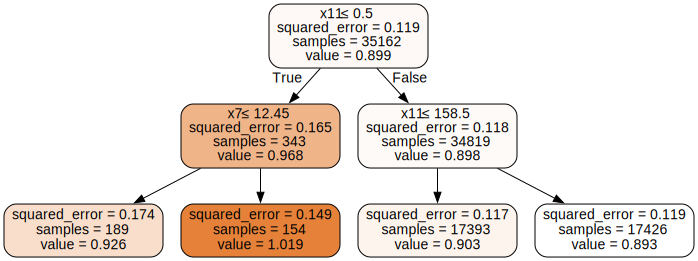

In [74]:
dot_data = sklearn.tree.export_graphviz(model.estimators_[1], out_file=None, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [48]:
#remodel the predictions dataframe by resetting index so that it merges with the predictions features
x_test.reset_index(inplace=True)
x_test.head()

,index,DayOfWeekDescription,tavg,prcp,snow,wspd,cluster
0,38962,Monday,11.3,0.0,0.0,19.700001,48.0
1,10612,Saturday,8.2,0.0,0.0,14.600000,155.0
2,14736,Sunday,19.5,0.0,0.0,17.700001,76.0
3,15153,Monday,16.4,0.0,0.0,13.800000,319.0
4,33884,Friday,8.0,1.8,0.0,16.900000,215.0


In [49]:
merged_test_prediction_df = pd.concat([x_test, predictions], axis=1)
merged_test_prediction_df.head()

,index,DayOfWeekDescription,tavg,prcp,snow,wspd,cluster,number_serious_accidents,number_slight_accidents,number_fatal_accidents
0,38962,Monday,11.3,0.0,0.0,19.700001,48.0,0.109403,0.903294,0.003686
1,10612,Saturday,8.2,0.0,0.0,14.600000,155.0,0.121837,0.903294,0.003686
2,14736,Sunday,19.5,0.0,0.0,17.700001,76.0,0.109403,0.903294,0.003686
3,15153,Monday,16.4,0.0,0.0,13.800000,319.0,0.121837,0.892574,0.003686
4,33884,Friday,8.0,1.8,0.0,16.900000,215.0,0.121837,0.892574,0.003686


In [50]:
merged_test_prediction_df['number_serious_accidents'] = merged_test_prediction_df['number_serious_accidents'].round().astype(int)
merged_test_prediction_df['number_slight_accidents'] = merged_test_prediction_df['number_slight_accidents'].round().astype(int)
merged_test_prediction_df['number_fatal_accidents'] = merged_test_prediction_df['number_fatal_accidents'].round().astype(int)
merged_test_prediction_df.head()

,index,DayOfWeekDescription,tavg,prcp,snow,wspd,cluster,number_serious_accidents,number_slight_accidents,number_fatal_accidents
0,38962,Monday,11.3,0.0,0.0,19.700001,48.0,0,1,0
1,10612,Saturday,8.2,0.0,0.0,14.600000,155.0,0,1,0
2,14736,Sunday,19.5,0.0,0.0,17.700001,76.0,0,1,0
3,15153,Monday,16.4,0.0,0.0,13.800000,319.0,0,1,0
4,33884,Friday,8.0,1.8,0.0,16.900000,215.0,0,1,0


In [51]:
import math 

rmse_serious_accidents = math.sqrt(mean_squared_error(merged_test_prediction_df['number_serious_accidents'].to_numpy(), y_test['number_serious_accidents'].to_numpy()))
rmse_slight_accidents = math.sqrt(mean_squared_error(merged_test_prediction_df['number_slight_accidents'].to_numpy(), y_test['number_slight_accidents'].to_numpy()))
rmse_fatal_accidents = math.sqrt(mean_squared_error(merged_test_prediction_df['number_fatal_accidents'].to_numpy(), y_test['number_fatal_accidents'].to_numpy()))

print('RMSE for serious accidents {}, RMSE for slight accidents {}, RMSE for fatal accidents {}'.format(rmse_serious_accidents, rmse_slight_accidents, rmse_fatal_accidents))

RMSE for serious accidents 0.340612327986161, RMSE for slight accidents 0.36171967253016124, RMSE for fatal accidents 0.065959293690167


Text(0.5, 1.0, 'Serious Accidents Predicted (Orange) vs Actual (Blue) ')

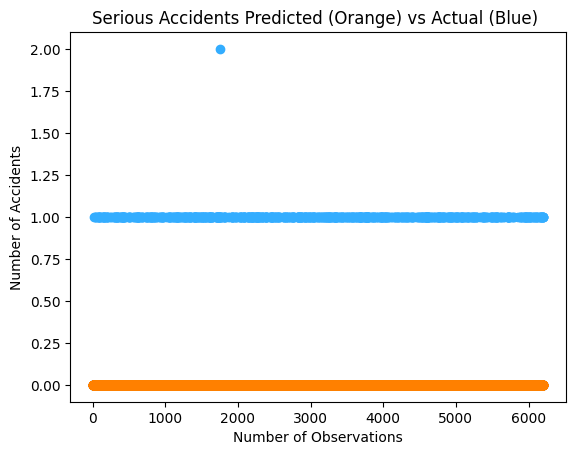

In [52]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(range(len(y_test['number_serious_accidents'])), y_test['number_serious_accidents'], color='#33adff')
ax.scatter(range(len(merged_test_prediction_df['number_serious_accidents'])), merged_test_prediction_df['number_serious_accidents'], color='#ff8000')
ax.set_ylabel('Number of Accidents')
ax.set_xlabel('Number of Observations')
ax.set_title('Serious Accidents Predicted (Orange) vs Actual (Blue) ')